In [1]:
import mxnet as mx 
from importlib import import_module
import cv2
import matplotlib.pyplot as plt 
%matplotlib inline  
import numpy as np 

/Users/Ken/anaconda/lib/python3.5/site-packages/traitlets/traitlets.py:811: DeprecationWarning: A parent of InlineBackend._config_changed has adopted the new (traitlets 4.1) @observe(change) API
  clsname, change_or_name), DeprecationWarning)


<mxnet.io.MXDataIter object at 0x1520682588> <mxnet.io.MXDataIter object at 0x15206827f0>
DataBatch: data shapes: [(100, 3, 28, 28)] label shapes: [(100,)]


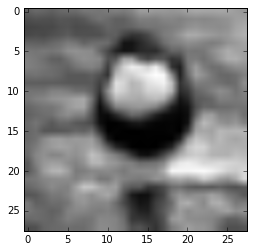

In [2]:
# 1. data reading
# labels in order: 
"""
0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck
"""

def get_cifar10():
    # TODO fill all the blanks 
    # Hint
    # rgb mean default: '123.68,116.779,103.939',
    # pad size: whatever you think is valid, pad to 32 is good 
    # image shape:  the image shape feed into the network, e.g. (3,224,224)')
    # num-classes: the number of classes
    # num-examples:  the number of training examples, 50000 :)
    # data-nthreads: default=4,number of threads for data decoding, how many cpus do you have
    # dtype: default is float32, can be data type: float32 or float16')
    train = mx.io.ImageRecordIter(
            path_imgrec         = './cifar10_train.rec',
            label_width         = 1,
            mean_r              = 123.68,
            mean_g              = 116.779,
            mean_b              = 103.939,
            data_name           = 'data',
            label_name          = 'softmax_label',
            data_shape          = (3,28,28),
            batch_size          = 100,
            pad                 = 2,# padding to 32 by 32
            fill_value          = 255, # default value
            preprocess_threads  = 4, # need to check the machine running on
            shuffle             = True)
    val = mx.io.ImageRecordIter(
            path_imgrec         = './cifar10_val.rec',
            label_width         = 1,
            mean_r              = 123.68,
            mean_g              = 116.779,
            mean_b              = 103.939,
            data_name           = 'data',
            label_name          = 'softmax_label',
            data_shape          = (3,28,28),
            batch_size          = 100,
            pad                 = 2,
            fill_value          = 255,
            preprocess_threads  = 4,
            shuffle             = True)
    return train, val

train, val = get_cifar10()
# TODO write the script to look what is inside train and val
# Check the image size, and label 
# Display the image 
# Question? check MXNET_course/mxnet-week3/cifar10/step_by_step_debug.ipynb
print (train, val)
sample = train.next()
print(sample)
randidx = np.random.randint(0,99)
sample_img = sample.data[0].asnumpy()[randidx]
sample_img = np.squeeze(sample_img).sum(axis=0)
plt.imshow(sample_img, cmap='gray')
plt.show()

['data', 'bn_data_gamma', 'bn_data_beta', 'conv0_weight', 'stage1_unit1_bn1_gamma', 'stage1_unit1_bn1_beta', 'stage1_unit1_conv1_weight', 'stage1_unit1_bn2_gamma', 'stage1_unit1_bn2_beta', 'stage1_unit1_conv2_weight', 'stage1_unit1_sc_weight', 'stage1_unit2_bn1_gamma', 'stage1_unit2_bn1_beta', 'stage1_unit2_conv1_weight', 'stage1_unit2_bn2_gamma', 'stage1_unit2_bn2_beta', 'stage1_unit2_conv2_weight', 'stage1_unit3_bn1_gamma', 'stage1_unit3_bn1_beta', 'stage1_unit3_conv1_weight', 'stage1_unit3_bn2_gamma', 'stage1_unit3_bn2_beta', 'stage1_unit3_conv2_weight', 'stage2_unit1_bn1_gamma', 'stage2_unit1_bn1_beta', 'stage2_unit1_conv1_weight', 'stage2_unit1_bn2_gamma', 'stage2_unit1_bn2_beta', 'stage2_unit1_conv2_weight', 'stage2_unit1_sc_weight', 'stage2_unit2_bn1_gamma', 'stage2_unit2_bn1_beta', 'stage2_unit2_conv1_weight', 'stage2_unit2_bn2_gamma', 'stage2_unit2_bn2_beta', 'stage2_unit2_conv2_weight', 'stage2_unit3_bn1_gamma', 'stage2_unit3_bn1_beta', 'stage2_unit3_conv1_weight', 'stage2_un

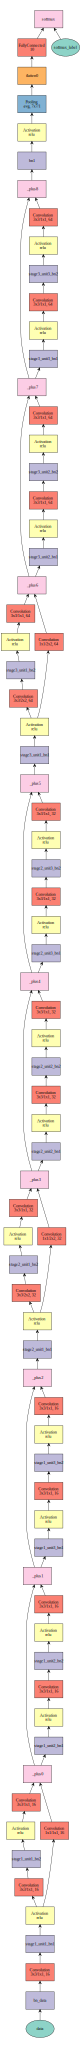

In [3]:
# 2 model getting 
# TODO read through resnet.py file for understanding
def get_resnet():
    net = import_module('resnet')
    sym = net.get_symbol(10,20,"3,28,28")
    return sym 
sym = get_resnet()

# TODO 
# 1. Plot and visualize the network. Put your comments about its architecture (why bottlenet)
# 2. List all weight and output (Question? check MXNET_course/mxnet-week3/cifar10/step_by_step_debug.ipynb)
# Hint: check mx.viz.plot


arg_name = sym.list_arguments()
out_name = sym.list_outputs()
print (arg_name)
print (out_name)  
mx.viz.plot_network(sym,hide_weights=True,save_format='pdf',title='resnet8')

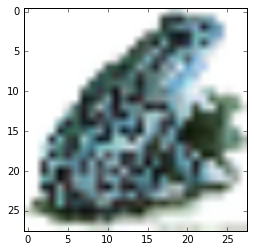

<class 'numpy.ndarray'>
(1, 3, 28, 28)


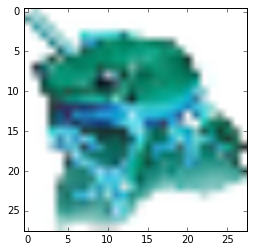

<class 'numpy.ndarray'>
(1, 3, 28, 28)
The very small training dataset contain:  (2, 3, 28, 28)
small dataset is:  <class 'mxnet.io.NDArrayIter'>
DataBatch: data shapes: [(1, 3, 28, 28)] label shapes: [(1,)]
DataBatch: data shapes: [(1, 3, 28, 28)] label shapes: [(1,)]


In [24]:
# 3 sanity check random image inference
img1 = cv2.imread("frog.jpg")
img1 = cv2.resize(img1,(28,28))# you need to pad it if you do padding for you nework
plt.imshow(img1)
plt.show()
print(type(img1))
img1 = img1.transpose((2,0,1)).reshape((1,3,28,28))
print(img1.shape)

img2 = cv2.imread("frog2.jpg")
img2 = cv2.resize(img2,(28,28))# you need to pad it if you do padding for you nework
plt.imshow(img2)
plt.show()
print(type(img2))
img2 = img2.transpose((2,0,1)).reshape((1,3,28,28))
print(img2.shape)

img = np.vstack([img1,img2])
print("The very small training dataset contain: ", img.shape)

# TODO: figure out how to convert numpy array to mx.nd.array
img_mxnd = mx.nd.array(img) 
label_mxnd = mx.nd.array([6,6]) # 6 is frog, give 6 as label
img_itr = mx.io.NDArrayIter(data=img_mxnd, data_name='data', 
                            label_name='softmax_label', label=label_mxnd,
                            batch_size=1) # ??? Hint the name should "data" and softmax_label
print("small dataset is: ", type(img_itr))
for each in img_itr:
    print(each)
    
    
## NDArrayIter has not next() function, it can not work in mod.fit
# TODO bind the random img to network 
# question? check mxnet-week3/cifar10/train_cifar10.py
from importlib import import_module
net_test = import_module('resnet')
sym_test = net_test.get_symbol(3,20,"3,28,28")
test_model_prefix = 'frog_resnet'
check_point = mx.callback.do_checkpoint(test_model_prefix)

         
            



In [22]:
img_itr.provide_data

[DataDesc[data,(1, 3, 28, 28),<class 'numpy.float32'>,NCHW]]

In [25]:
class simpleImgIter(mx.io.NDArrayIter):
    def __init__(self, data, data_names, label_names, label, batch_size):
        #assert(data.shape[0] == label.shape[0])
        super().__init__(data, label, batch_size, data_name = data_names, label_name = label_names)
        self.cur_batch = 0
        self.num_batches = data.shape[0]/batch_size  #take the floor by default because its int/int
    
    def __iter__(self):
        return self

    def reset(self):
        super(simpleImgIter,self).reset()
        self.cur_batch = 0

    def __next__(self):
        return self.next()

    @property
    def provide_data(self):
        return super(simpleImgIter,self).provide_data

    @property
    def provide_label(self):
        return super(simpleImgIter,self).provide_label

    def next(self):
        if self.cur_batch < self.num_batches:          
            # data = self.data[self.cur_batch:self.cur_batch+self.batch_size]
            data = [self.data[0][1][i] for i in range(self.cur_batch*self.batch_size,self.cur_batch*self.batch_size+self.batch_size)]
            #print(data)
            label = [self.label[0][1][i] for i in range(self.cur_batch*self.batch_size,self.cur_batch*self.batch_size+self.batch_size)]
            #print(label)
            self.cur_batch += 1
            return mx.io.DataBatch(data, label)
        else:
            raise StopIteration

In [26]:
img_itr = simpleImgIter(data=img_mxnd, data_names='data', 
                            label_names='softmax_label', label=label_mxnd,
                            batch_size=1) # ??? Hint the name should "data" and softmax_label
print("small dataset is: ", type(img_itr))

mod = mx.mod.Module(context=[mx.cpu(0)], # depend on machine
                    symbol=sym_test,
                    data_names=['data'],
                    label_names=['softmax_label'])
mod.bind(img_itr.provide_data, img_itr.provide_label)
#mod.init_params(mx.init.Xavier(magnitude=2.0))
#mod.init_optimizer('sgd',optimizer_params=(('learning_rate', 0.1), ))

# run forward perdiction 
# TODO fill the mod.predict 
# check mod.predict
out = mod.fit(img_itr,
       num_epoch=10,
       #eval_metric = ['ce', 'acc']
        eval_metric = 'acc')
print(out.asnumpy())

small dataset is:  <class '__main__.simpleImgIter'>


AssertionError: all data must have the same batch size: batch_size = 3, but softmax_label has shape (1,)

In [ ]:
# 4 overfit small dataset 
# TODO fill all ???
mod.bind(img_itr.provide_data, img_itr.provide_label)
mod.init_params(mx.init.Xavier(magnitude=2.0))
mod.init_optimizer('sgd',optimizer_params=(('learning_rate', 0.1), ))

# run forward perdiction
metric = mx.metric.create('acc')

for epoch in range(5):
    img_itr.reset()
    metric.reset()
    for batch in img_itr:
        mod.forward(batch, is_train=True)
        mod.update_metric(metric, batch.label)
        mod.backward()
        mod.update()
    print ('Epoch {}, Train {}'.format(epoch, metric.get()))
    # You should get 100% accuacy on these two images


In [ ]:
#5 (optional) train cifar10 on resnet(~epoch) if you have GPU. Build the training script from week2
mod_cifar = mx.mod.Module(???)
train.reset()
val.reset()
mod_cifar.fit(train_data=train,
              eval_data=val,
              num_epoch=10,
              optimizer=???, 
              optimizer_params={???}, 
              epoch_end_callback=mx.callback.do_checkpoint('resnet_cifar_10'),
              initializer=mx.init.Xavier(rnd_type='gaussian', factor_type='in',magnitude=2),
              batch_end_callback=[mx.callback.Speedometer(128, 1)], 
              eval_metric=['acc','ce'])

In [ ]:
# 6 (optional) Wild test on your model 